# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
from pandas.core import datetools
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<hr style="height:2pt">


<div class='theme'>Linear Algebra, Accuracy, and Confidence Intervals </div>
In this part of the homework, you will see how _uncertainty_ in the beta coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. You will explore a linear-algebra formula that tells us how accurately we've learned the beta parameters, going beyond simple SEs to describe the joint distribution of the betas. You'll see that the structure of the $X$ data can strongly impact how well we can learn the betas, and you'll determine desirable prroperties of the $X$ data.

The data for this supplement are the same as in lab1, and are imported for you in the cells below.

In [43]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 5 [4 pts] </b> </div>

**5.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The regression line.
 3. The upper and lower bounds of the 95% confidence interval for the _predicted_ (not the observed) `mpg` at any given displacement.
 
**5.2** Why do we have a confidence interval for our predicted value? Why isn't the prediction just a single number?

**5.3** Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them? paying attention to the confidence interval (5.1.3) above?

**5.4** Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center? 

### Answers

**5.1 Fit a linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various levels of `disp` and make a well-labled plot showing**
 1. **The observed values of weight and mpg**
 2. **The regression line**
 3. **The upper and lower bounds of the 95% confidence interval for the _mean/predicted mpg_ at any given displacement**
 

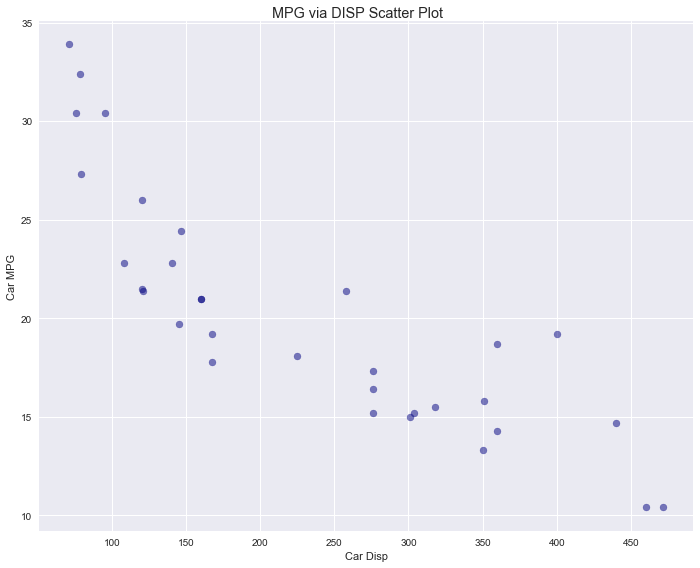

In [5]:
#First let's plot the data
import seaborn as sns; sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df.disp, df.mpg, alpha=0.5, color='navy')
fig.suptitle('MPG via DISP Scatter Plot')
fig.tight_layout(pad=2);
ax.set_xlabel('Car Disp')
ax.set_ylabel('Car MPG')
ax.grid(True)

In [6]:
#Then must first create the linear regression object from stats model
x_disp = sm.add_constant(df.disp)
OLSmodel = sm.OLS(df.mpg, x_disp)
results = OLSmodel.fit()
predicted_y = results.predict(x_disp)
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           9.38e-10
Time:                        15:34:25   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Great, now let's get the CI for all predicted values
predictions = results.get_prediction().summary_frame()
display(predictions.head())

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515


Text(0,0.5,'Car MPG')

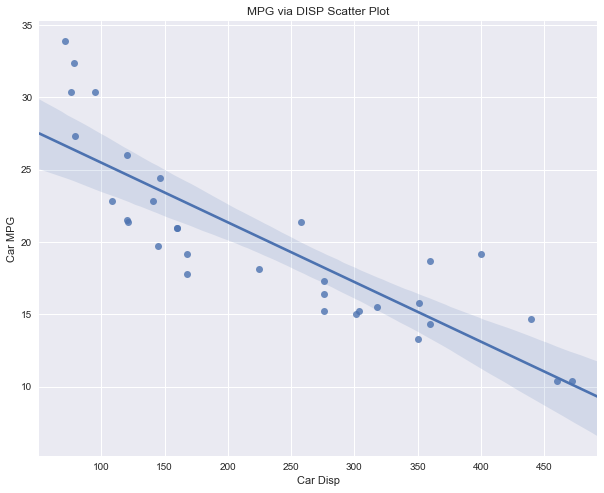

In [8]:
#Ok, let's put it all together and make it pretty.
fig = plt.subplots(figsize=(10,8))
ax = sns.regplot(x='disp', y='mpg', data=df)
ax.set_title('MPG via DISP Scatter Plot')
ax.set_xlabel('Car Disp')
ax.set_ylabel('Car MPG')

**5.2 Why do we have a confidience interval for our predicted value? Why isn't the prediction just a single number?**

Because we have to test lots of different possible coeficients to rule out the coefficients that will not work (because they equal zero), which leaves us with an interval of values that _do_ work (and do not equal/contain zero). This helps us gain more certainty about the predictive value of our model, because we now know that if we were to repeatedly re-collect the data and build 95% CIs, 95% of the intervals would contain the true value.

**5.3 Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them, paying attention to the confidence interval (5.2.3) above?**

The estimated value of y for x=400 is about 13.1 miles per gallon, with a 95% confidence interval of [11.105976,	15.121638], meaning that if we were to construct 100 confidence intervals with re-collected data, then about 95 of these CIs would contain the true value. However, we don't know if our confidence interval reported above is one of those 95 (nor if our predicted y is in one of those hypothetical 95 CIs), although the odds are in our favor.

**5.4 Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center?**

So, in this model we need to remember that both the intercept and the slope are uncertain -- which is why we're estimating for them. We don't know what the population values really are, and if we were to resample, our regression line would look different, because our estimated values would be different. The regression line will presumably pass through the mean of $x$ and $y$ in the population though, so even if the slope changes, you'll see most of the diffference in slopes towards the min and max, not in the middle of the data.

Similarly, if you were to resample again and again, the constant would change each time, moving the regression line up and down. So, imagine that the constant changes with repeated sampling and you'll see some amount of spread at the mean of $x$. Then imagine that the slope changes with repeated sampling at the same time as the constant is changing, and you see larger spread at the min and max of $x$, which makes the CI appear to curve as we move away from the mean.

<div class='exercise'><b> Question 6 [8 pts] </b></div>
Hopefully, in the question above you recognized that uncertainty in the beta coefficients could impact the certainty of our predictions. In this question and the next, we're going to explore properties of the data that can make us more or less certain of the values of the betas.

**6.1** Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.

**6.2** The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. 

**6.3** Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.

**6.4** Interpret the matrix formula above. At a minimum, discuss what affects our ability to estimate the betas accurately. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will be graded only on the specified minimum].

**Hint**: we don't know $\sigma^2$, but we can estimate them.<BR>
**Hint**: remember that numpy's normal distribution expects a standard deviation and not a variance.

### Answers

**6.1 Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.**

In [9]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        15:34:26   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**6.2 The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. **

In [10]:
resid = model.resid
sigma_squared = (np.sum(resid**2)/(len(y)-6))
x_inv = np.linalg.inv(np.dot(np.transpose(X),X))
cov1 = x_inv*sigma_squared


**6.3 Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.**

In [11]:
print('Standard Errors from statsmodels')
print(model.bse)

print('Standard errors from covariance matrix')
print(cov1.diagonal()**0.5)

Standard Errors from statsmodels
const    9.918090
cyl      0.715246
disp     0.011907
hp       0.015267
wt       1.252386
qsec     0.487461
dtype: float64
Standard errors from covariance matrix
[ 9.91809038  0.71524643  0.01190742  0.01526723  1.25238578  0.48746086]


They are the same.

**6.4 Interpret the matrix formula above. At a minimum, discuss what affects our ability to accurately estimate the betas. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will only be graded on the specified minimum].**

If the $\sigma^2$ is large, then we will have more covariance. Similarly, if the variables in our matrix have a high degree of colinearity, our standard errors will be higher and it will hinder our ability to accurately estimate the betas. If we have completely uncorrelated variables, our covariance matrix will be diagonal and our standard errors will be small, making it easier to accurately estimate the betas.

<div class='exercise'> <b> Question 7 [12 pts]: What affects our knowledge of the betas? </b></div> 


**7.1** Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution). What effects do you see on our ability to estimate the betas?

**7.2** Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight. What change do you see in our certainty about weight's effect on mpg?

**7.3** Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise. How well can we estimate the betas for this dataset, and which ones are correlated?

**7.4** If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, or by deciding which columns to measure/keep), how would you like your features to relate? Specifically, how can you get as good an estimate of the betas as possible?

**Hint**: Should introducing pure noise give us meaningfully more accurate beta values? <br>
**Hint**: What happens if $X^TX$ is diagonal?

### Answers

**7.1  Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution) ... **

In [55]:
noise = np.random.exponential(size=32)[...,None]
noise.shape
noise.dtype

dtype('float64')

In [56]:
edit1 = df.assign(noise=noise)
display(edit1.head())

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,noise
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1.986955
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2.356660
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.767693
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.103277
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3.459228


In [60]:
y1 = edit1[['mpg']].values
X1 = edit1[['cyl','disp','hp','wt','qsec','noise']]
X1 = sm.add_constant(X1)

model_1 = OLS(endog=y1, exog=X1).fit()
#predictions1 = model_1.predict(X1)
display(model.summary())
display(model_1.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        19:25:22   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     23.98
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           3.11e-09
Time:                        19:25:22   Log-Likelihood:                -71.814
No. Observations:                  32   AIC:                             157.6
Df Residuals:                      25   BIC:                             167.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1889     10.340      3.597      0.001      15.893      58.484
cyl           -1.0475      0.752     -1.393      0.176      -2.596       0.501
disp           0.0119      0.012      0.989      0.332      -0.013       0.037
hp            -0.0188      0.016     -1.146      0.263      -0.053       0.015
wt            -4.2989      1.277     -3.367      0.002      -6.928      -1.669
qsec           0.1998      0.504      0.396      0.695      -0.838       1.238
noise         -0.2689      0.493     -0.545      0.590      -1.284       0.747
==============================================================================
Omnibus:                        3.454   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.497
Skew:                           0.681   Prob(JB):                        0.287
Kurtosis:                       3.137   Cond. No.                     6.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this particular instance, our standard errors on most of the betas increased when we added random noise. However, our ability to estimate the betas overall is unchanged, as adding pure noise shouldn't give us meaningfully more accurate betas. Sometimes adding noise will make our SE decrease, sometimes it will make our SE increase, and sometimes it will have no effect.

**7.2 Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight ... **

In [66]:
ratio = (df.hp/df.wt).values
edit2 = df.assign(ratio=ratio)
display(edit2.head())
edit2.dtypes

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ratio
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,41.984733
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,38.260870
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,40.086207
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,34.214619
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,50.872093


name      object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
ratio    float64
dtype: object

In [68]:
y2 = edit2[['mpg']].values
X2 = edit2[['cyl','disp','hp','wt','qsec','ratio']]
X2 = sm.add_constant(X2)

model_2 = OLS(endog=y2, exog=X2).fit()
display(model.summary())
display(model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        19:34:13   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     23.73
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           3.46e-09
Time:                        19:34:13   Log-Likelihood:                -71.955
No. Observations:                  32   AIC:                             157.9
Df Residuals:                      25   BIC:                             168.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1047     12.967      2.939      0.007      11.398      64.811
cyl           -1.1980      0.744     -1.610      0.120      -2.731       0.335
disp           0.0124      0.012      1.015      0.320      -0.013       0.038
hp            -0.0054      0.041     -0.131      0.897      -0.090       0.079
wt            -4.6785      2.087     -2.242      0.034      -8.977      -0.380
qsec           0.2238      0.508      0.440      0.664      -0.823       1.271
ratio         -0.0357      0.130     -0.274      0.786      -0.304       0.232
==============================================================================
Omnibus:                        4.333   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.092
Skew:                           0.743   Prob(JB):                        0.213
Kurtosis:                       3.330   Cond. No.                     8.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`ratio` is both dependent on and colinear with `weight`, which increases the SE of `weight` as a predictor for `mpg`. This decreases our certainty about the beta of `weight`.

**7.3 Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise... **

In [79]:
norm_noise = np.random.normal(0, 0.01, size=32)[...,None]
edit3 = df.assign(norm_noise=norm_noise)
display(edit3.head())

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,norm_noise
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.000352
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-0.011409
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-0.000448
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.011088
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.011552


In [81]:
edit3['combo'] = (edit3.hp + edit3.disp + edit3.wt + edit3.norm_noise)
display(edit3.head())

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,norm_noise,combo
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.000352,272.620352
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-0.011409,272.863591
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-0.000448,203.319552
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.011088,371.226088
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.011552,538.428448


In [82]:
y3 = edit3[['mpg']].values
X3 = edit3[['cyl','disp','hp','wt','qsec','combo']]
X3 = sm.add_constant(X3)

model_3 = OLS(endog=y3, exog=X3).fit()
display(model.summary())
display(model_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        19:50:27   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     23.65
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           3.59e-09
Time:                        19:50:27   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             158.0
Df Residuals:                      25   BIC:                             168.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8830     10.162      3.531      0.002      14.954      56.812
cyl           -1.1565      0.731     -1.583      0.126      -2.661       0.348
disp          -0.5104     54.524     -0.009      0.993    -112.805     111.784
hp            -0.5382     54.523     -0.010      0.992    -112.830     111.754
wt            -4.7460     54.371     -0.087      0.931    -116.725     107.233
qsec           0.2533      0.500      0.507      0.617      -0.776       1.283
combo          0.5223     54.523      0.010      0.992    -111.770     112.815
==============================================================================
Omnibus:                        4.943   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.547
Skew:                           0.783   Prob(JB):                        0.170
Kurtosis:                       3.457   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`hp`, `wt`, and `disp`, are all correlated with `combo`, because I made `combo` out of those variables. You can tell this by the standard error. The reason the standard errors are so high, is because the variables are very collinear. We cannot estimate the betas very well, because the standard errors are so high.

**7.4 If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, ... **

If I could choose the different features in my data, I would choose completely orthogonal features. This way, my ability to accurately estimate the betas in the model would be as high as possible because the features would be uncorrelated. As we found in 7.1, adding in pure noise should have no effect on our ability to estimate the betas, because that noise would presumably be uncorrelated with our independent variables.